<a href="https://colab.research.google.com/github/Tanisha2910/Data-Science-Python/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data Exploratory for Titanic
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [40]:
data.shape

(891, 12)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
EXPLORATORY DATA ANALYSIS

In [42]:
# EDA is used to explore the target and features so we know if we will need to transform or normalize some of the features based on their distribution, delete some because it might not give us any information in predicting future outcomes, or create some new features that might be useful for prediction.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
data.describe(include = ['O'])

# For all the object variables (categorical and text), you can see how many categories are in each variable from the "unique" row. For example, the "Sex" variable has only 2 categories.


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Howard Hugh ""Harry""",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [0]:
# HISTOGRAMS OF THE NUMERIC VARIABLES 
# Histograms are very good visualization technique to check the distribution of numerical data.
# In our data set, "PassengerId" are unique numbers from 1-891 to label each person and "Survived" and "Pclass" are also categorical data, so I will not plot a histogram for these variables.

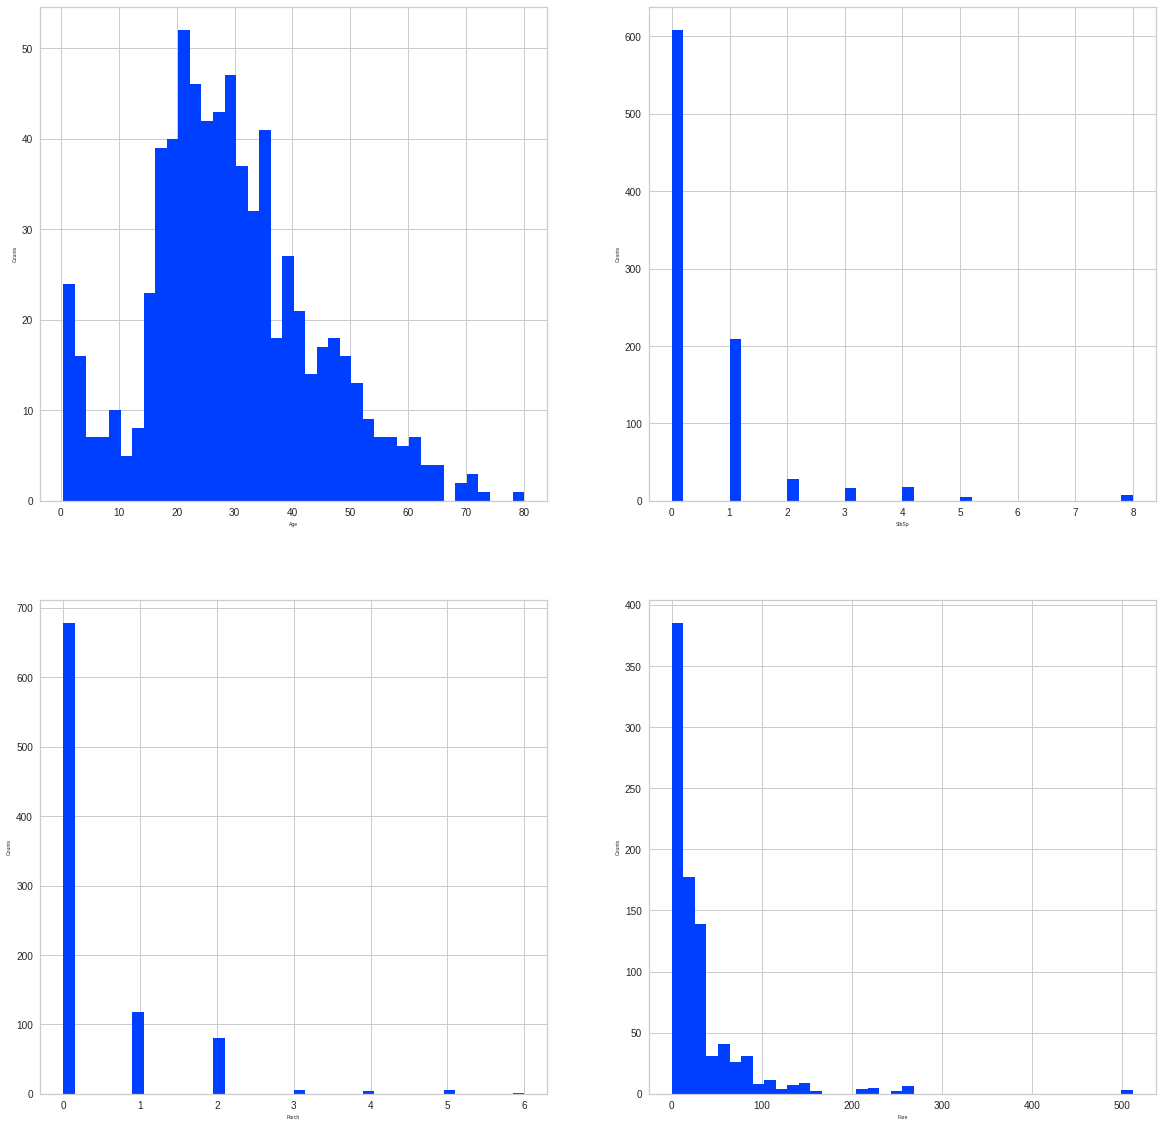

In [44]:
# import visualization packages
import matplotlib.pyplot as plt

# set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)

# make subplots
fig, axis = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxis = num_features
yaxis = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histogram

axis = axis.ravel()
for idx, ax in enumerate(axis):
  ax.hist(data[num_features[idx]].dropna(), bins = 40)
  ax.set_xlabel(xaxis[idx], fontsize = 5)
  ax.set_ylabel(yaxis[idx], fontsize = 5)
  ax.tick_params(axis='both', labelsize = 10)
  
  
# From the histogram, we see that all the values in the variables seem in the correct range. Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. 
# A large amount of the tickets sold were less than $50. 
#There are very few tickets sold where the fare was over $500.

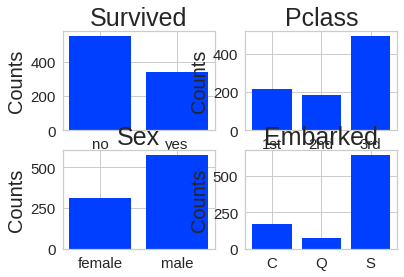

In [45]:
# BARPLOT OF THE CATEGORICAL DATA

# We will create a barplot of the categorical data variables in the data set. Since "Ticket" and "Cabin" have too many levels(more than 100), i have not make the bar plot of these

# set up the fig size
%matplotlib inline

# make subplots
fig, axis = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived' : {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axis[0, 0].bar(X_Survived, Y_Survived)
axis[0, 0].set_title('Survived', fontsize = 25)
axis[0, 0].set_ylabel('Counts', fontsize = 20)
axis[0, 0].tick_params(axis = 'both', labelsize = 15)

# make the data read to feed into visualizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name = 'Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name = 'Counts')['Counts']

# male the bar plot
axis[0, 1].bar(X_Pclass, Y_Pclass)
axis[0, 1].set_title('Pclass', fontsize = 25)
axis[0, 1].set_ylabel('Counts', fontsize = 20)
axis[0, 1].tick_params(axis = 'both', labelsize = 15)

# make the data read to feed into the visualizer
X_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Counts']

# make the bar plot
axis[1, 0].bar(X_Sex, Y_Sex)
axis[1, 0].set_title('Sex', fontsize = 25)
axis[1, 0].set_ylabel('Counts', fontsize = 20)
axis[1, 0].tick_params(axis = 'both', labelsize = 15)

# make the data feed into the visualizer
X_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Counts']

# make the bar plot
axis[1, 1].bar(X_Embarked, Y_Embarked)
axis[1, 1].set_title('Embarked', fontsize = 25)
axis[1, 1].set_ylabel('Counts', fontsize = 20)
axis[1, 1].tick_params(axis = 'both', labelsize = 15)

ARE NUMERICAL VARIABLES CORRELATED?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


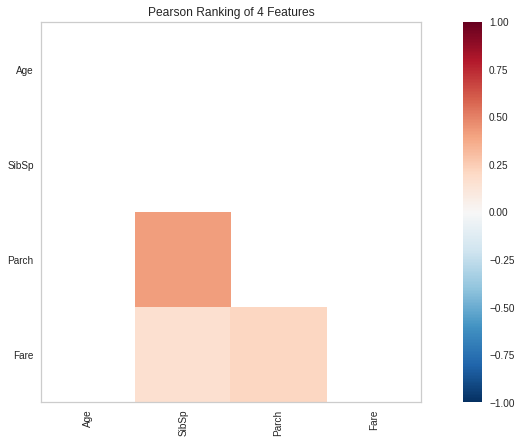

In [46]:
# In order to get a sense of whether the numerical variables in our data set are correlated, we will create a Pearson Ranking Visualization

# set up a fig size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for the visualization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the dataframe

X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features, algorithm = 'pearson')
visualizer.fit(X)     # fit the data
visualizer

visualizer.transform(X)   #Transform the data
visualizer.poof()        # Draw/ show/ poof the data

#From the Pearson ranking figure below, we can see that the correlation between variables are low (<0.5).

Are The Distribution of Numerical Variables the Same Or Different among Survived and not Survived

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


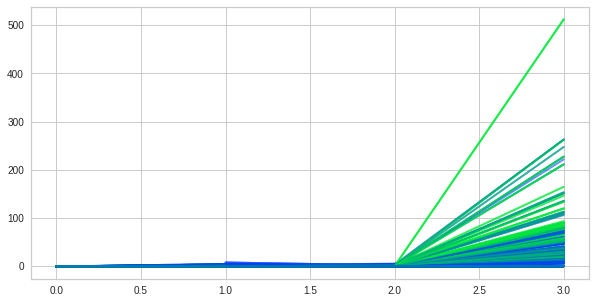

In [47]:
# Next we will compare the distributions of the numerical variables between between passengers that survived and those that did not survive to see if there are any significant differences.
# We can do this with Parallel Co ordinates visualization

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 50

#setup the color for yellowbrick visualizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna = True)) / (data[feature].max(skipna = True) - data[feature].min(skipna = True))
    
    # Extract the numpy arrays from the data frame
    x = data_norm[num_features].as_matrix()
    y = data.Survived.as_matrix()
    
    # Instantiate the visualizer 
    visualizer = ParallelCoordinates(classes = classes, features = num_features)
    
    visualizer.fit(x, y)  # Fit the data to the visualizer
    visualizer.transform(x)  # Transform the data
    visualizer.poof          # Draw/ show/ poof the data

Are there different survival rates in different categories?

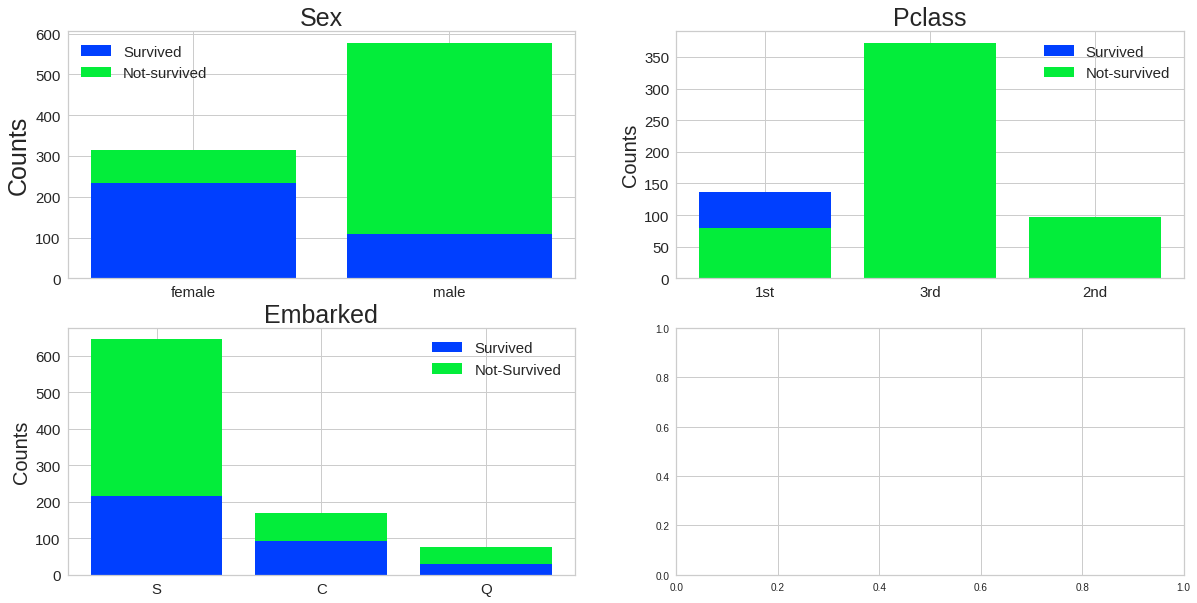

In [48]:
# speaking of survival rates how they differ across our categorical variables ?
# we can get a sense of this by creating daceted stacked barplots fot each variables

# set up the figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axis = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not Survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not Survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot 
p1 = axis[0,0].bar(Sex_survived.index, Sex_survived.values)
p2 = axis[0,0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom = Sex_survived.values)

axis[0, 0].set_title('Sex', fontsize = 25)
axis[0, 0].set_ylabel('Counts', fontsize = 25)
axis[0, 0].tick_params(axis = 'both', labelsize = 15)
axis[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer 
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

# male the bar plot
p3 = axis[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axis[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values)

axis[0,1].set_title('Pclass', fontsize = 25)
axis[0,1].set_ylabel('Counts', fontsize = 20)
axis[0,1].tick_params(axis = 'both', labelsize = 15)
axis[0,1].legend((p3[0], p4[0]),('Survived', 'Not-survived'), fontsize = 15)

# Make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# make the bar plot
p5 = axis[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axis[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom = Embarked_survived.values)
axis[1, 0].set_title('Embarked',  fontsize = 25)
axis[1, 0].set_ylabel('Counts', fontsize = 20)
axis[1, 0].tick_params(axis = 'both', labelsize = 15)
axis[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-Survived'), fontsize = 15)


In [0]:
# As we can see from the above features more females survived than men and the death rathes in the 3rd ticket class and the embarkation from southampton port are much higher than the others


**FEATURE SELECTION AND FEATURE ENGINEERING**

In [0]:
# In this step we will do alot of things such as drop some features, fill in missing values, log transformations,
# and one hot encoding for the categorical features.

# DROPPING FEATURES WE WILL NOT USE

# WE will delete the features "PassengerId", "Name", "Ticket" amd "Cabin" from our model. The reasons are as follows
# 1."PassengerId": just a series of numbers from 1-891, which is used to label each person
# 2. "Name": the names of all the passengers, which might give some information like if there are some people are related based on the last names.but to simplify things up at this stage , i will pass this feature
# 3. "Ticket" and "cabin" : too many levels with unknown information


In [0]:
# Filling missing values
# From EDA we know that there are some missing values in "Age", "Cabin" and "Embarked" variables
# we will fill the missing values in age using the median age and fill the missing values in embarked with "S" since there are only 2 values missing and "S" is the most represented in the dataset

In [49]:
# filling missing age data with median value
def fill_na_median(data, inplace = True):
    return data.fillna(data.median(), inplace = inplace)
fill_na_median(data['Age'])

# check the result
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
# fill with the most represented values

def fill_na_most(data, inplace = True):
    return data.fillna('S', inplace = inplace)
  
fill_na_most(data['Embarked'])

# check result
data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [51]:
# LOG TRANSFORMATION OF THE FARE
# from the histogram we can see that the distribution of fare is highly right skewed. For dealing with highly skewed positive data one of the strategies that is used is log transformation, so the skeweness will be less.
# since the minimum is 0, we will add 1 to the raw value, so there will not be any errors for log transformation

# log transformation
def log_transformation(data):
    return data.apply(np.log1p)
  
data['Fare_log1p'] = log_transformation(data['Fare'])

# cheq the data
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


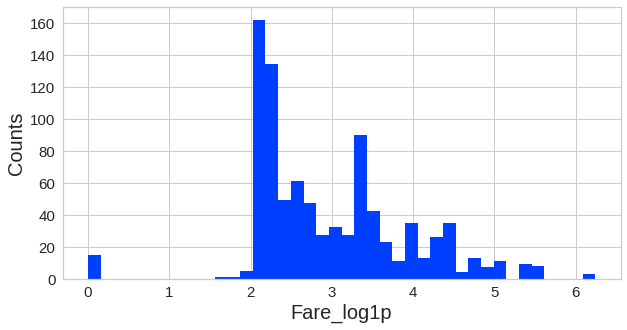

In [52]:
# now we will cheq the distribution using histogram of fare
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins = 40)
plt.xlabel('Fare_log1p', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)

# we can see from below figure that after log transformation the data is much less skewed

ONE HOT ENCODING FOR CATEGORICAL DATA

In [53]:
# we use one hot encoding for categorical features to transform them into numbers. 
# get the categorical data

cat_features = ['Pclass', 'Sex', 'Embarked']
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
data_cat

# one hot encoding
data_cat_dummies = pd.get_dummies(data_cat)

# cheq the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


MODEL TRAINING AND MODEL EVALUATION

In [0]:
# here i will put model training and model evaluation in one part since Yellowbrick is a very good package that can wrap the model and creates good visualization of the model performance, making model much easier and fun

# PREPARE DATA FOR MODEL TRAINING AND EVALUATION

# before we train the model, we need to split the data into 2 sets: training and validation
# We will use training data set to trin the model and use the validation dataset to evaluate the model

In [0]:
# create a whole features dataset that can be used for train and validation data splitting 
# here we will combine the numerical features and the dummie features together ..

features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_x = pd.concat([data[features_model], data_cat_dummies], axis = 1)

# create a whole target dataset that can be used for train ans validation data splitting

data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']



In [55]:
# Seperate the data into training and validation and check the details of the dataset
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(data_model_x, data_model_y, test_size = 0.3, random_state = 11)

# number of samples in each set
print("No. of samples in training set:", x_train.shape[0])
print("No of samples in validation set:", x_val.shape[0])

# Survivied and not survived
print('\n')
print('No of survived and not survived in training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in validation set:')
print(y_val.value_counts())



No. of samples in training set: 623
No of samples in validation set: 268


No of survived and not survived in training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


MODEL TRAINING AND EVALUATION VISUALIZATION

In [0]:
# Since the purpose of this project is to predict if the passenger has survived or not , its a classification problem.
# There is a lof of algos that can be used to do classification modelling. Here we will use logostic reegression
#There is also a lof of evaluation metrics you use to evaluate your model for classification problem.Here I will use confusion metrics, precision,recall,F1 score and ROC curve.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


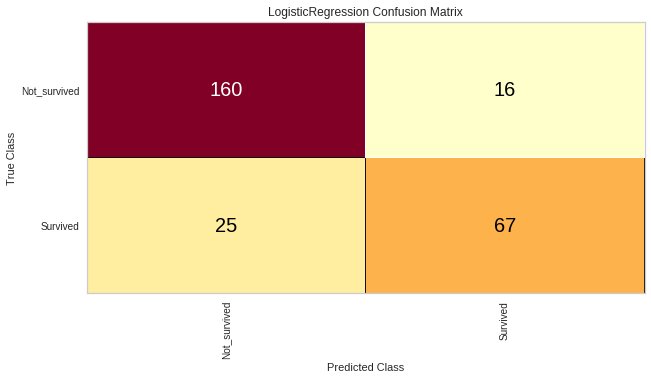

In [56]:
# CONFUSION MMATRIX
# with yellobrick we can create a visual confusion matrix that will allow us to easily see how well we were able to predict and compute our accuracy score

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

# Instantiate the classifier model
model = LogisticRegression()

# The confusion matrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes, percent = False)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_val, y_val)

# To create the confusion matrix, we need some test data.  Score runs predict() on the data
# and then creates the confusion _matrix from scikit learn.

cm.score(x_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

In [0]:
# As we can see from confusion matrix the accuracy of the model is (160+67)/(160+25+16+67) = 84.70%
# # the accuracy score is much higher than the random guess, which is 50.00%
# it seems like our model worked pretty well which means we should use a machine learning algorithm to predictwho survived in this instance


PRECISION, RECALL AND F1 SCORE

In [67]:
pip install classificationReport

  ERROR: Could not find a version that satisfies the requirement classificationReport (from versions: none)
ERROR: No matching distribution found for classificationReport


In [65]:
# we can visually generate a classification report, which includes precision, recall and F1 score for our classification model
# set the size of figure and font size
from sklearn.metrics import classificationReport
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

# Initiate the visualizer 
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(x_train, y_train)  # fit the training data to the visualizer
visualizer.score(x_val, y_val) # evaluate the model on the test data
g = visualizer.poof()

ImportError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


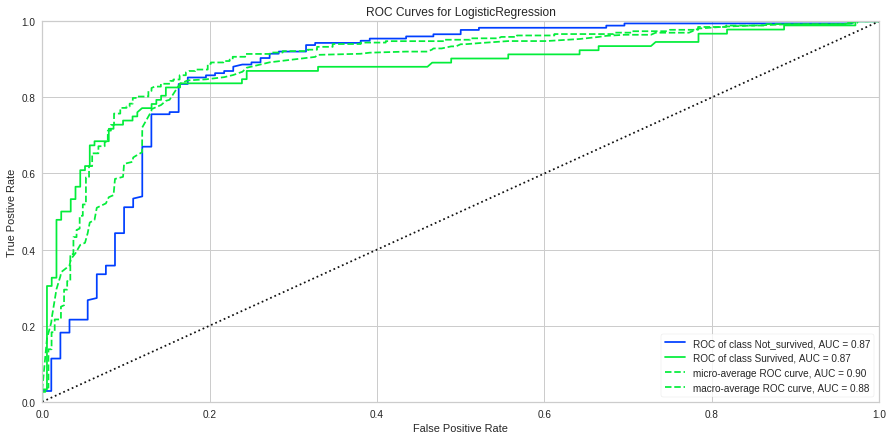

In [69]:
# ROC CURVE AND AUC
# IN ADDITION WITH THE PREVIOUS 2 METHODS we can also evaluateour classification model using ROC curve for each class

# Instantiate the visualizer
visualizer = ROCAUC(model)
visualizer.fit(x_train, y_train) # fit the training data to the visualizer
visualizer.score(x_val, y_val) # evaluate the model on the tesr data

g = visualizer.poof() 


# in ROC CURVE above the dotted diagonal line in the pictures shows when the result is randomly guessed . A good model shoul be above that line
